In [1]:
#You should delete the save files to run a new simulation. If this is not done this script will load the previous checkpoints and logs.

#!pip install tensorflow --upgrade


#!git clone https://github.com/kenjyoung/MinAtar.git
#%cd MinAtar
#!pip install .

#!apt install swig
#!pip install box2d box2d-kengz

!pip install -U dopamine-rl

Requirement already up-to-date: dopamine-rl in /usr/local/lib/python3.6/dist-packages (3.1.8)


In [2]:
import numpy as np
import os
import sys
#from dopamine.agents.dqn import dqn_agent

import dopamine
from dopamine.discrete_domains import run_experiment
from dopamine.colab import utils as colab_utils
from absl import flags
import gin.tf

In [3]:
import matplotlib
#matplotlib.use('TKAgg')

#import minatar
#minatar.__version__

In [4]:
#import matplotlib
#matplotlib.use('TkAgg')

In [5]:
from google.colab import drive 
drive.mount('/content/drive')

path = '/content/drive/My Drive/SaveFiles/Data/Dopamine_github/'
#LOG_PATH = os.path.join(path, 'dqn')
LOG_PATH = os.path.join(path, 'dqn_test')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
import sys
sys.path.append(path)
#from dqn_agent_new import *
#from rainbow_agent_new import *
#from quantile_agent_new import*
from m_dqn import*

Instructions for updating:
non-resource variables are not supported in the long term


Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
def create_random_dqn_agent(sess, environment, summary_writer=None):
#def create_random_dqn_agent(sess, environment, summary_writer=None):
  """The Runner class will expect a function of this type to create an agent."""
  #return JaxDQNAgentNew(num_actions=environment.action_space.n)
  #return JaxRainbowAgentNew(num_actions=environment.action_space.n)
  #return JaxQuantileAgentNew(num_actions=environment.action_space.n)
  
  return MunchausenDQNAgent(sess,num_actions=environment.action_space.n)
  #return MunchausenDQNAgentNew(num_actions=environment.action_space.n)
 
#gin.parse_config_file('/content/drive/My Drive/SaveFiles/Data/Dopamine_github/dqn_cartpole.gin')
#gin.parse_config_file('/content/drive/My Drive/SaveFiles/Data/Dopamine_github/rainbow_cartpole.gin')
#gin.parse_config_file('/content/drive/My Drive/SaveFiles/Data/Dopamine_github/quantile_cartpoleA.gin')
gin.parse_config_file('/content/drive/My Drive/SaveFiles/Data/Dopamine_github/cartpole.gin')

random_dqn_runner = run_experiment.TrainRunner(LOG_PATH, create_random_dqn_agent)

----------------------------------------------------------------------------
replay_action_one_hot: Tensor("action_one_hot_1:0", shape=(128, 2), dtype=float32, device=/device:CPU:*) (128, 2)
----------------------------------------------------------------------------
replay_next_log_policy: Tensor("sub_3:0", shape=(128, 2), dtype=float32, device=/device:CPU:*) (128, 2)
AAAAAAAAAAAAAAAAAA
----------------------------------------------------------------------------
replay_next_policy: Tensor("Softmax:0", shape=(128, 2), dtype=float32, device=/device:CPU:*) (128, 2)
----------------------------------------------------------------------------
_replay_next_target_net_outputs.q_values: Tensor("Target_1/basic_discrete_domain_network_1/fully_connected_2/BiasAdd:0", shape=(128, 2), dtype=float32, device=/device:CPU:*) (128, 2)
----------------------------------------------------------------------------
replay_next_qt_softmax: Tensor("Sum_3:0", shape=(128,), dtype=float32, device=/device:CPU:*) 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [8]:
print('Will train agent, please be patient, may be a while...')
random_dqn_runner.run_experiment()
print('Done training!')

Will train agent, please be patient, may be a while...
Instructions for updating:
Use standard file APIs to delete files with this prefix.


Instructions for updating:
Use standard file APIs to delete files with this prefix.


Done training!


In [9]:
data = colab_utils.read_experiment(LOG_PATH, verbose=True, summary_keys=['train_episode_returns'])
data['agent'] = 'Breakout'
data['run'] = 1

Reading statistics from: /content/drive/My Drive/SaveFiles/Data/Dopamine_github/dqn_test//logs/log_29


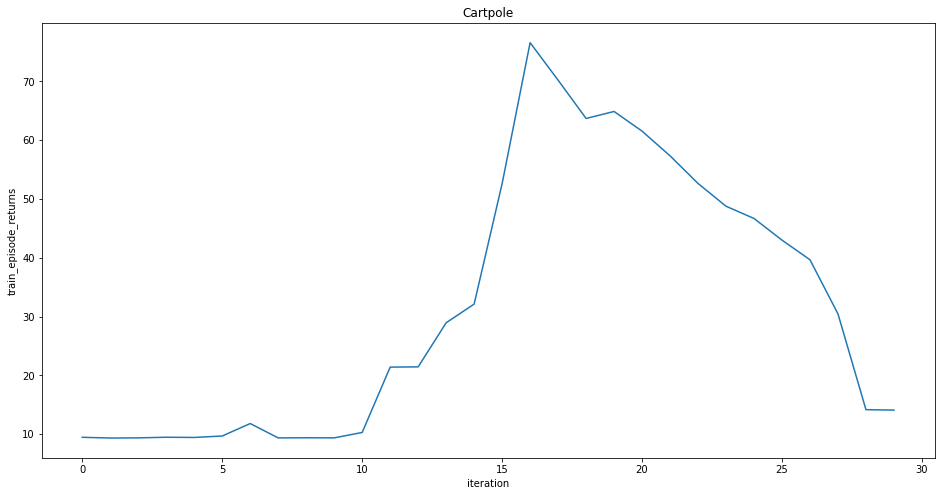

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x='iteration', y='train_episode_returns',   data=data, ax=ax)
plt.title('Cartpole')
plt.show()